# Day 5, Exercise 1 - Pandas and plotting

### There are 2 parts to this exercise, with answers listed under each part
1. The orange tree data
2. The VCF data (optional)

There are various ways to write the code for these tasks. Here, we present one solution in the answers, but if you have written a different one, that's perfectly fine. Just ensure that you test your code to confirm that it performs as expected.

<hr style="border: 2px solid #000080;">

## 1. The orange tree data

### Description:
The purpose of this exercise is to use a small tabular dataset to get familiar with basic concepts and operations of the Pandas library, as well as its plotting capabilities.

### Tasks:

  - Load the file `Orange_1.tsv` into Pandas dataframe
  - Print the height column
  - Print the data for the tree at age 2
  - Find the maximum circumference
  - How old was the tree at that time?
  - Plot the circumference in relation to the height
  
___

### The answers

In [2]:
# 1. Load the file `Orange_1.tsv` into Pandas dataframe
import pandas as pd
df = pd.read_csv('../../downloads/Orange_1.tsv', sep='\t')
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


In [18]:
# 2. Print the height column
df['height']

0    30
1    35
2    40
3    50
Name: height, dtype: int64

In [19]:
# 3. Print the data for the tree at age 2
df[df.age == 2]

,age,circumference,height
1,2,3,35


In [24]:
# 4. Find the maximum circumference
max_c = df.circumference.max()
max_c

10

In [26]:
# 5. How old was the tree at that time?
# using iloc[0] to extract just the value
df[df.circumference == max_c].age.iloc[0]

4

Text(0, 0.5, 'Height')

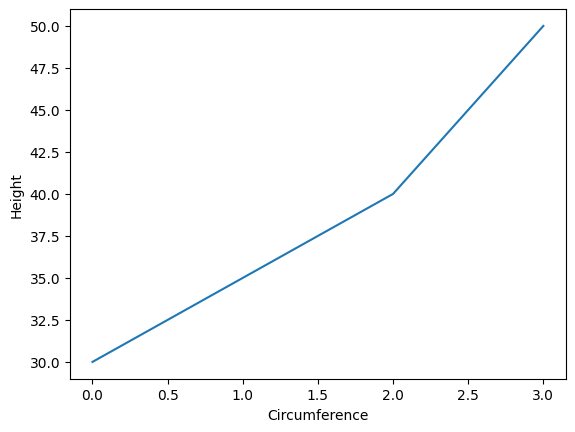

In [47]:
# Plot the circumference in relation to the height
df.height.plot(x='circumference', y='height')
plt.xlabel("Circumference")
plt.ylabel("Height")

<hr style="border: 2px solid #000080;">

## 2.  The VCF data (optional)

Now we return to the VCF file `genotypes_small.vcf` and process it again with Pandas

- The file `genotypes_small.vcf` can be found <a href="https://python-bioinfo.bioshu.se/downloads/genotypes_small.vcf" target="_blank">here</a> if you have not downloaded yet.

### Tasks:

- Load the VCF file into a Pandas DataFrame.

- Plot the histogram of Allele Count (AC) for chromosome 5.

- Plot the average Allele Count (AC) for all chromosomes, with the x-axis representing the chromosome number and the y-axis representing the AC. Are there any differences in the AC across chromosomes?

### Tips:

1. Pandas can not parse the metadata and header of VCF properly since the metadata lines are started with `##` and header line is started with `#`. Use the following function to load the VCF file into a Pandas DataFrame

```python
def read_vcf(file_path):
    """
    Reads a VCF file and returns it as a pandas DataFrame.
    """
    with open(file_path, 'r') as file:
        # Read lines that do not start with '##' (i.e., skip metadata lines)
        lines = [line for line in file if not line.startswith('##')]
    
    header = lines[0].strip().split('\t') # Split the first line (header) by tabs to get column names
    
    header[0] = header[0].lstrip('#')  # Remove leading '#' from the first column name
    
    data = [line.strip().split('\t') for line in lines[1:]] # Split the remaining lines by tabs
    
    vcf_df = pd.DataFrame(data, columns=header) # Create a pandas DataFrame with the data and column names

    return vcf_df
```

2. The data for AC is located in the `INFO` column of the VCF file

3. To further parse the data of a column, you can use the `apply` methd, which apply the operation (e.g. a function) on every element along an axis of the DataFrame or Series.

```python
# function to parse the INFO column and extra the AC 
# an example of INFO field 
# AA=g;AC=1;AN=120;DP=226;GP=1:773106;BN=132
def parse_AC(info_str):
    info_parts = info_str.split(';')
    for part in info_parts:
        if 'AC=' in part:
            return part.split('=')[1] # return the value in the field `AC=1`, i.e. `1`
    return 'unknown'  
```

- After that, you can create the 'AC' column by 
```python
vcf_df['AC'] = vcf_df['INFO'].apply(parse_AC)
# remember to convert string to numeric, errors='coerce' means 
# invalid parsing will be set as NaN (Not a Number) instead of raising an error. 
vcf_df['AC'] = pd.to_numeric(vcf_df['AC'], errors='coerce') 
```

There are plenty of other tutorials online, here are a few:
    

-  https://www.youtube.com/playlist?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL- A nice youtube tutorial series

- https://swcarpentry.github.io/python-intermediate-mosquitoes/01-intro-python.html

- https://www.tutorialspoint.com/python_pandas/index.htm

- https://www.tutorialspoint.com/python_pandas/python_pandas_visualization.htm (The visualization section of the tutorial above)

---

### The answers

In [28]:
# Load the VCF file into a Pandas DataFrame.
def read_vcf(file_path):
    with open(file_path, 'r') as file:
        lines = [line for line in file if not line.startswith('##')]

    header = lines[0].strip().split('\t')
    header[0] = header[0].lstrip('#')
    data = [line.strip().split('\t') for line in lines[1:]]

    vcf_df = pd.DataFrame(data, columns=header)

    return vcf_df 

vcf_file = "../../downloads/genotypes_small.vcf"
vcf_df = read_vcf(vcf_file)
vcf_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,sample0,...,sample50,sample51,sample52,sample53,sample54,sample55,sample56,sample57,sample58,sample59
0,1,762969,rs115616822,G,A,.,PASS,AA=g;AC=1;AN=120;DP=226;GP=1:773106;BN=132,GT:DP:CB,0/0:1:SMB,...,0/0:4:SMB,0/0:5:SMB,0/0:7:SMB,0/0:4:SMB,0/0:2:SMB,0/0:0:SMB,0/0:2:SMB,0/0:2:SMB,0/0:5:SMB,0/1:8:SMB
1,1,806004,rs116179678,T,A,.,PASS,AA=N;AC=34;AN=120;DP=344;GP=1:816141;BN=132,GT:DP:CB,0/0:2:SM,...,0/0:9:MB,0/0:2:MB,0/0:6:SMB,0/1:5:MB,1/0:5:SB,0/0:9:MB,0/0:5:MB,0/0:5:MB,0/0:5:SMB,0/1:7:SB
2,1,812244,rs116091741,C,T,.,PASS,AA=c;AC=17;AN=120;DP=303;GP=1:822381;BN=132,GT:DP:CB,0/0:1:MB,...,0/1:4:MB,0/0:2:SMB,0/0:3:SMB,0/0:2:SMB,0/0:7:SMB,0/0:6:SMB,0/0:3:SMB,0/0:2:SMB,0/1:1:SMB,0/0:4:SMB
3,1,846035,rs116711631,C,A,.,PASS,AA=C;AC=2;AN=120;DP=291;GP=1:856172;BN=132,GT:DP:CB,0/0:3:SMB,...,0/0:1:SMB,0/0:4:SMB,0/0:3:SMB,0/0:6:SMB,0/0:5:SMB,0/0:1:SMB,0/0:6:SMB,0/0:2:SMB,0/0:3:SMB,0/0:3:SMB
4,1,888330,rs41285808,C,T,.,PASS,AA=C;AC=8;AN=120;DP=231;GP=1:898467;BN=127,GT:DP:CB,0/0:5:SMB,...,0/0:3:SMB,0/0:2:SMB,0/0:1:SMB,0/0:1:SMB,0/0:4:SMB,0/0:3:SMB,0/0:0:SMB,0/1:6:SMB,0/0:4:SMB,0/0:4:SMB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,22,49358799,rs115743514,T,C,.,PASS,AA=C;AC=6;AN=120;DP=257;GP=22:51011933;BN=132,GT:DP:CB,0/0:3:SMB,...,0/0:3:SMB,0/0:1:SMB,0/0:2:SMB,0/0:2:SMB,0/0:4:SMB,0/0:5:SMB,0/0:1:SMB,0/0:2:SMB,0/0:3:SMB,0/0:2:SMB
64370,22,49387253,rs12169357,G,C,.,PASS,AA=G;AC=6;AN=120;DP=318;GP=22:51040387;BN=120,GT:DP:CB,0/0:3:SMB,...,0/0:1:SMB,0/0:3:SMB,0/0:1:SMB,0/0:0:SMB,0/0:5:SMB,0/0:9:SMB,0/0:2:SMB,0/0:4:SMB,0/0:5:SMB,0/0:2:SMB
64371,22,49419155,rs1003322,C,A,.,PASS,AA=C;AC=30;AN=120;DP=302;GP=22:51072289;BN=86,GT:DP:CB,0/0:7:SMB,...,0/0:2:SMB,0/0:1:SMB,0/0:2:SMB,0/1:7:SMB,1/0:5:SMB,0/0:7:MB,1/0:1:MB,1/0:6:SMB,0/0:5:SMB,0/0:4:SMB
64372,22,49456858,rs9628185,T,C,.,PASS,AA=C;AC=52;AN=120;DP=282;HM2;HM3;GP=22:5110999...,GT:DP:CB,1/0:5:SMB,...,1/1:3:SMB,1/0:2:SMB,0/1:2:SMB,0/0:8:SMB,0/0:4:SMB,1/0:2:SMB,1/1:1:SM,1/0:8:SMB,0/0:1:SMB,1/0:1:SMB


In [29]:
# Note that the data for AC is within the `INFO` column, which is seperated by ';'
vcf_df['INFO']

0               AA=g;AC=1;AN=120;DP=226;GP=1:773106;BN=132
1              AA=N;AC=34;AN=120;DP=344;GP=1:816141;BN=132
2              AA=c;AC=17;AN=120;DP=303;GP=1:822381;BN=132
3               AA=C;AC=2;AN=120;DP=291;GP=1:856172;BN=132
4               AA=C;AC=8;AN=120;DP=231;GP=1:898467;BN=127
                               ...                        
64369        AA=C;AC=6;AN=120;DP=257;GP=22:51011933;BN=132
64370        AA=G;AC=6;AN=120;DP=318;GP=22:51040387;BN=120
64371        AA=C;AC=30;AN=120;DP=302;GP=22:51072289;BN=86
64372    AA=C;AC=52;AN=120;DP=282;HM2;HM3;GP=22:5110999...
64373        AA=A;AC=8;AN=120;DP=385;GP=22:51155446;BN=131
Name: INFO, Length: 64374, dtype: object

In [34]:
# Extract data of the field AC and create a new column  vcf_df['AC']
def parse_AC(info_str):
    info_parts = info_str.split(';')
    for part in info_parts:
        if 'AC=' in part:
            return part.split('=')[1]
    return 'unknown' 

vcf_df['AC'] = vcf_df['INFO'].apply(parse_AC)
vcf_df['AC'] = pd.to_numeric(vcf_df['AC'], errors='coerce')
vcf_df['AC']

0         1.0
1        34.0
2        17.0
3         2.0
4         8.0
         ... 
64369     6.0
64370     6.0
64371    30.0
64372    52.0
64373     8.0
Name: AC, Length: 64374, dtype: float64

In [36]:
# Extra data for chromosome 5
vcf_df_chrom5 = vcf_df[vcf_df['CHROM'] == '5']
vcf_df_chrom5

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,sample0,...,sample51,sample52,sample53,sample54,sample55,sample56,sample57,sample58,sample59,AC
19951,5,106565,rs115608877,G,T,.,PASS,AA=.;AC=7;AN=120;DP=91;GP=5:53565;BN=132,GT:DP:CB,1/0:1:SM,...,0/0:0:SM,0/0:3:SM,0/0:4:SM,0/0:2:SM,0/0:1:SM,0/0:0:SM,0/0:0:SM,0/0:1:SM,0/0:2:SM,7.0
19952,5,165993,rs75695791,A,G,.,PASS,AA=.;AC=1;AN=120;DP=294;GP=5:112993;BN=131,GT:DP:CB,0/0:3:SMB,...,0/0:2:SMB,0/0:3:SMB,0/0:5:SMB,0/0:5:SMB,0/0:5:SMB,0/0:2:SMB,0/0:6:SMB,0/0:10:SMB,0/0:8:SMB,1.0
19953,5,206188,rs6554798,T,C,.,PASS,AA=.;AC=9;AN=120;DP=338;HM2;GP=5:153188;BN=116,GT:DP:CB,0/0:2:SMB,...,0/0:1:SMB,0/1:4:SMB,1/1:6:SMB,0/0:0:SMB,0/0:9:SMB,0/0:2:SMB,0/0:6:SMB,0/0:3:SMB,0/0:6:SMB,9.0
19954,5,231900,rs6872820,G,A,.,PASS,AA=G;AC=5;AN=120;DP=306;GP=5:178900;BN=116,GT:DP:CB,0/0:2:SMB,...,0/0:5:SMB,0/0:3:SMB,1/0:10:SMB,0/0:5:SMB,0/0:7:SMB,0/0:4:SMB,0/0:3:SMB,0/0:3:SMB,0/0:6:SMB,5.0
19955,5,259290,rs56264962,G,A,.,PASS,AA=A;AC=24;AN=120;DP=315;GP=5:206290;BN=129,GT:DP:CB,1/0:5:SMB,...,0/0:4:SMB,0/0:2:SMB,1/1:8:SMB,0/1:6:SMB,0/0:6:SMB,0/0:5:SMB,0/0:2:SMB,0/0:4:SMB,0/0:0:SMB,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24105,5,180498016,rs13176120,C,G,.,PASS,AA=c;AC=43;AN=120;DP=214;HM2;GP=5:180565410;BN...,GT:DP:CB,0/0:4:SMB,...,0/0:2:SMB,1/0:4:SMB,0/1:4:SM,0/1:2:SMB,0/0:2:SMB,0/1:1:SMB,0/0:7:SMB,0/0:2:SMB,0/1:2:SMB,43.0
24106,5,180522250,rs2770973,C,T,.,PASS,AA=t;AC=104;AN=120;DP=327;HM2;GP=5:180589644;B...,GT:DP:CB,1/1:6:SMB,...,0/1:4:SMB,1/0:5:SMB,1/1:3:SMB,1/1:3:SMB,1/1:11:SMB,1/1:1:SMB,1/1:1:SMB,1/1:2:SMB,1/1:2:SMB,104.0
24107,5,180553724,rs73364050,C,G,.,PASS,AA=c;AC=7;AN=120;DP=329;GP=5:180621118;BN=130,GT:DP:CB,0/0:2:SMB,...,0/0:2:SMB,0/0:4:SMB,0/0:11:SMB,0/0:3:SMB,0/0:5:SMB,0/0:3:SMB,0/0:4:SMB,0/0:6:SMB,0/0:3:SMB,7.0
24108,5,180594586,rs17714046,T,C,.,PASS,AA=T;AC=6;AN=120;DP=325;HM2;HM3;GP=5:180661980...,GT:DP:CB,0/0:5:SMB,...,0/0:3:SMB,0/0:4:SMB,0/0:11:SMB,1/1:7:SMB,0/0:2:SMB,0/0:2:SMB,0/0:8:SMB,0/0:1:SMB,0/0:4:SMB,6.0


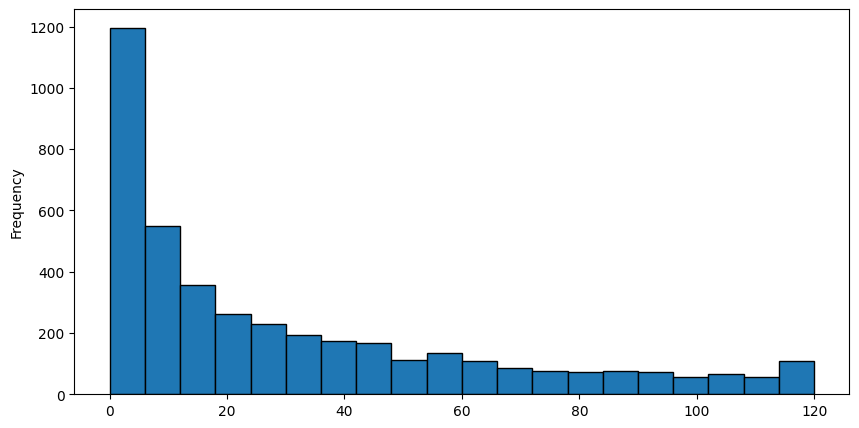

In [37]:
# Plot the histogram of AC

plt.figure(figsize=(10, 5))
vcf_df_chrom5['AC'].plot(kind='hist', bins=20, edgecolor='black')
plt.show()  

In [41]:
# Get average AC for all chromosomes
average_ac = vcf_df.groupby('CHROM')['AC'].mean().reset_index()
average_ac.columns = ['CHROM', 'Average_AC']
average_ac

,CHROM,Average_AC
0,1,31.062413
1,10,32.696429
2,11,32.542740
3,12,31.632994
4,13,34.355565
5,14,30.281206
6,15,35.896296
7,16,31.342238
8,17,30.234108
9,18,32.982428


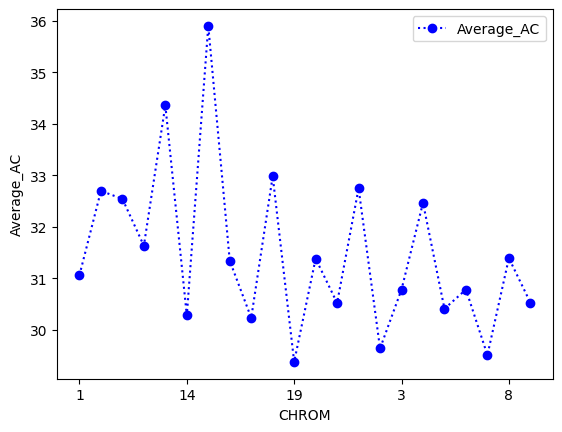

In [45]:
# Plot Average_AC against CHROM

average_ac.plot(x='CHROM', y='Average_AC', linestyle=':', marker='o', color='b')
plt.ylabel('Average_AC')
plt.xlabel('CHROM')
plt.show()

Text(0, 0.5, 'Average_AC')

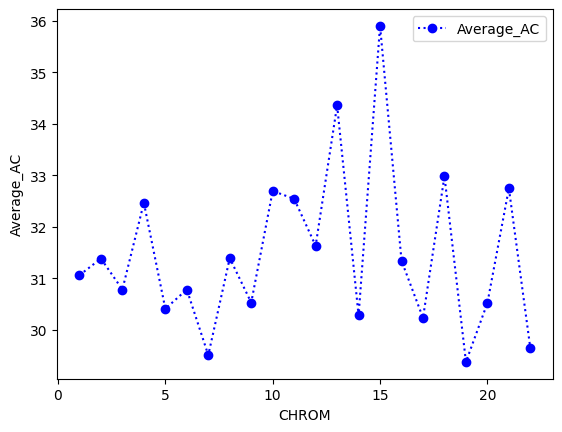

In [46]:
# Sort by chromosome names and make the plot again
average_ac['CHROM'] = pd.to_numeric(average_ac['CHROM'])
average_ac_sorted = average_ac.sort_values(by='CHROM')
average_ac_sorted.plot(x='CHROM', y='Average_AC', linestyle=':', marker='o', color='b')
plt.xlabel('CHROM')
plt.ylabel('Average_AC')